# McDonald's Data 2021-2024
This dataset provides the annual financial data of McDonald’s from 2021 to 2024 in a multi-level categorized format. Each row belongs to a financial statement, which is further broken down into headings and subheadings.

### Import Liberaries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Loading Data

In [8]:
df = pd.read_csv('Mcdonalds data 2021-24.csv')
df.head()

,table,heading,subheading,2024,2023,2022,2021,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,"2,836","2,617",NaN,NaN,NaN,NaN,NaN
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,"5,179","6,456",NaN,NaN,NaN,NaN,NaN
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733,715,NaN,NaN,NaN,NaN,NaN
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,"6,585","6,094",NaN,NaN,NaN,NaN,NaN
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,"5,985","5,638",NaN,NaN,NaN,NaN,NaN


### Preparing and Cleaning Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048504 entries, 0 to 1048503
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   table        85 non-null     object 
 1   heading      85 non-null     object 
 2   subheading   85 non-null     object 
 3   2024         85 non-null     float64
 4   2023         85 non-null     float64
 5   2022         85 non-null     object 
 6   2021         85 non-null     object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(7), object(5)
memory usage: 96.0+ MB


----------------

* There are unnamed columns with **`NaN`** values that have no meaning or use, so it's better to drop them.

In [10]:
#Dropping unnecessary columns
unnamed = ['Unnamed: 7', 'Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11']

df = df.drop(unnamed, axis=1)

In [13]:
df.head()

,table,heading,subheading,2024,2023,2022,2021
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,"2,836","2,617"
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,"5,179","6,456"
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733,715
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,"6,585","6,094"
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,"5,985","5,638"


* We can see that data points in years **`2023`** and **`2024`** are of float dtype and data points in years **`2021`** and **`2022`** are object dtypes, so in order to have a consistent dataset we will convert the object columns to float dtype

In [25]:
df['2021'].unique()

array(['2,617', '6,456', '715', '6,094', '5,638', '1,353', '351', nan,
       '3,096.80', '2,677.20', '2,273.80', '2,335.00', '260.4',
       '2,377.80', '329.7', '-483.3', '10,356.00', '1,185.80', '42.3',
       '9,127.90', '1,582.70', '7,545.20', '$10.11 ', '$10.04 ', '$5.25 ',
       '746.3', '751.8', '4709.2', '1872.4', '55.6', '511.3', '1201.2',
       '2782.5', '4449.5', '13552', '41916.6', '-17196', '0', '1006.8',
       '705.5', '360.7', '236.7', '363.3', '1347', '35622.7', '13020.9',
       '1896.8', '738.3', '1081', '2075.6', '16.6', '8231.6', '57534.7',
       '-2573.7', '-67810.2', '7545.2', '1868.1', '-428.3', '139.2',
       '-97.8', '-339.1', '309.9', '-62.2', '225', '-302.5', '284',
       '-2040', '-374.2', '196.2', '106.2', '-53.9', '15.1', '1154.4',
       '-2240.9', '-845.5', '-3918.6', '285.7', '-46.7', '-120.1', '1260',
       '3449.9', '1197', '2404'], dtype=object)

In [26]:
df['2022'].unique()

array(['2,836', '5,179', '733', '6,585', '5,985', '1,536', '329', nan,
       '2,737.30', '2,617.40', '2,026.20', '2,349.70', '244.8',
       '2,492.20', '370.4', '973.6', '9,371.00', '1,207.00', '338.6',
       '7,825.40', '1,648.00', '6,177.40', '$8.39 ', '$8.33 ', '$5.66 ',
       '736.5', '741.3', '2,583.80', '2,115.00', '52', '673.4',
       '1,064.50', '2,900.40', '4,707.20', '12,565.70', '41,037.60',
       '-17,264.00', '0', '980.2', '661.1', '274.9', '255.1', '393.4',
       '1,237.40', '35,903.50', '12,134.40', '791.9', '757.8', '1,051.80',
       '1,997.50', '16.6', '8,547.10', '59,543.90', '-2,486.60',
       '-71,624.40', '6177', '1871', '-346', '167', '-570', '-264', '6',
       '31', '-547', '129', '-1899', '-807', '446', '39', '-457', '26',
       '3374', '-2202', '-3896', '-4168', '248', '38', '-254', '-2126',
       '4709', '2584', '1184', '3024'], dtype=object)

-------------

**First** we will need to remove special characters like the dollar sign **`$`**.

In [28]:
cols = ['2021','2022']

for col in cols:
    df[col] = df[col].astype('str').str.replace('$','',regex=False).str.replace(',','', regex=False).str.strip()
            

In [29]:
# Convert year columns to float dtype

df[cols] = df[cols].astype('float64')

In [30]:
df.head()

,table,heading,subheading,2024,2023,2022,2021
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,2836.0,2617.0
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,5179.0,6456.0
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733.0,715.0
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,6585.0,6094.0
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,5985.0,5638.0


---------

### Data Analysis and Visualization

In [31]:
df.describe()

,2024,2023,2022,2021
count,85.000000,85.000000,85.000000,85.000000
mean,2222.397882,2380.905882,2037.451529,2228.737647
std,13363.431265,12890.163342,12204.896011,11872.548583
min,-77375.000000,-74640.000000,-71624.400000,-67810.200000
25%,3.000000,12.000000,8.390000,10.040000
50%,636.000000,732.000000,733.000000,715.000000
75%,2536.000000,2886.000000,2584.000000,2404.000000
max,66834.000000,63480.000000,59543.900000,57534.700000


#### Revenue By Year

In [34]:
years = ['2021','2022','2023','2024']

df_years = df[years].sum().reset_index()
df_years.columns = ['year','revenue']
df_years.head()

,year,revenue
0,2021,189442.70
1,2022,173183.38
2,2023,202377.00
3,2024,188903.82


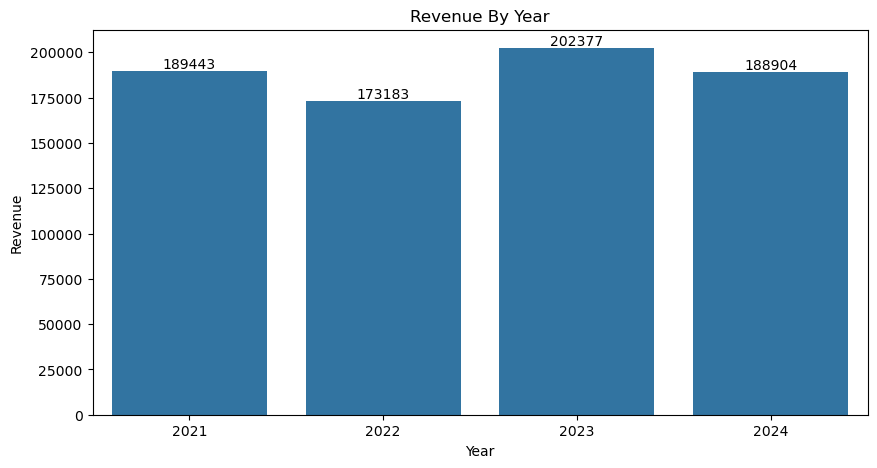

In [37]:
fig = plt.figure(figsize=(10,5))

ax = sns.barplot(x= df_years['year'], y=df_years['revenue'])
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Revenue By Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

#### Year on Year Growth

In [38]:
years = ['2021','2022','2023','2024']

growth = df[years].sum().pct_change() * 100
growth

2021          NaN
2022    -8.582711
2023    16.857056
2024    -6.657466
dtype: float64

* **`2022`** has suffered from a decline in revenue of `8.58%` less than the previous year, then in **`2023`** there was a spike in revenue by  `16.85%` more than the revenue achieved in **`2022`** before it dropped back by `6.65%` in **`2024`**.

--------

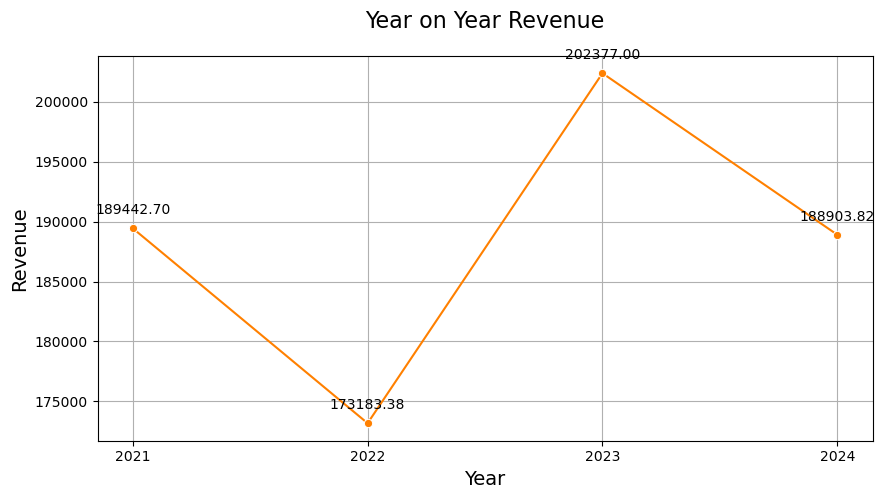

In [45]:
figure = plt.figure(figsize=(10,5))
ax = sns.lineplot(x= df_years['year'], y=df_years['revenue'], marker='o', color='#FF8000')

for x,y in zip(df_years['year'],df_years['revenue']):
    ax.annotate(f'{y:.2f}' , (x,y), textcoords='offset points', xytext=(0,10), ha='center')

plt.title('Year on Year Revenue',fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

#### Group By The Heading Column

In [50]:
grouped = df.groupby('heading')[years].sum()
grouped

,2021,2022,2023,2024
heading,,,,
cash_and_equivalents_at_beginning_of_year,3449.9,4709.00,2584.0,4579.00
cash_and_equivalents_at_end_of_year,4709.2,2584.00,4579.0,1085.00
cash_and_equivalents_increase_(decrease),1260.0,-2126.00,1996.0,-3495.00
changes_in_working_capital,454.2,-645.00,-108.0,-438.00
charges_and_credit,1142.1,1855.00,1251.0,1661.00
company_operated,9788.0,8748.00,9742.0,9782.00
current_assets,7148.5,5424.20,7986.0,4598.00
current_liabilities,4020.0,3802.10,6859.0,3861.00
effect_of_exchange_rates,-120.1,-254.00,-58.0,-101.00


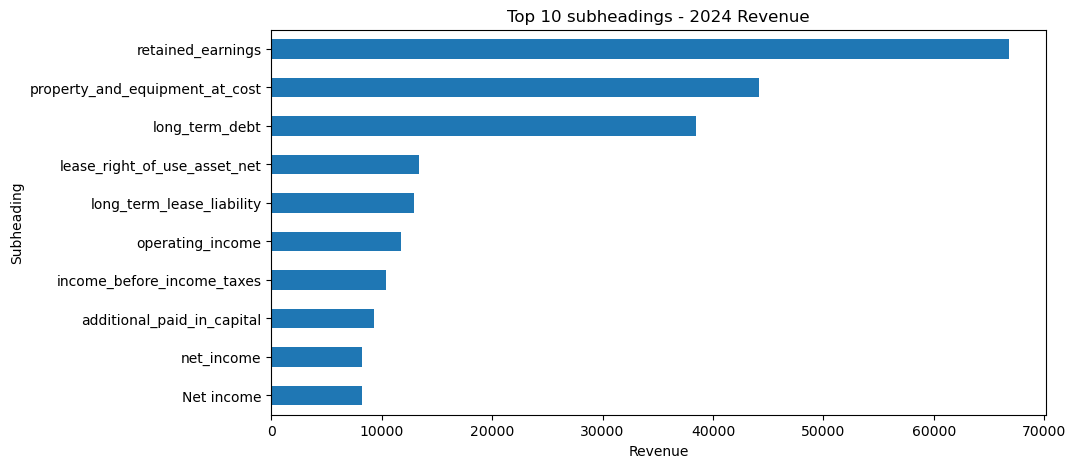

In [52]:
# Top 10 subheadings in the year 2024
top_subs = df.groupby('subheading')['2024'].sum().sort_values(ascending=False).head(10)

figure = plt.figure(figsize=(10,5))
top_subs.plot(kind='barh')
plt.xlabel('Revenue')
plt.ylabel('Subheading')
plt.title('Top 10 subheadings - 2024 Revenue')

plt.gca().invert_yaxis()
plt.show()

#### Preparing data for ML modeling

In [59]:
# Drop missing data
df_ml = df.dropna(subset=years)

#split the dataset into feature cols and target col
x = df_ml[['2021','2022','2023']]
y = df_ml[['2024']]

In [60]:
x.head()

,2021,2022,2023
0,2617.0,2836.0,3221.0
1,6456.0,5179.0,5702.0
2,715.0,733.0,819.0
3,6094.0,6585.0,7163.0
4,5638.0,5985.0,6549.0


In [61]:
y.head()

,2024
0,3197.0
1,5713.0
2,872.0
3,7211.0
4,6746.0


* Since we're dealing with numeric data, we will start with building a linear regression model.

In [64]:
# Importing liberaries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
# Split the dataset into 80% train data and 20% test data 
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Build a linear regression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(x_test)

print('MSE: ', mean_squared_error(y_test,y_pred))
print('R2 Score: ', r2_score(y_test,y_pred))

MSE:  588620.78553777
R2 Score:  0.9932596482701788


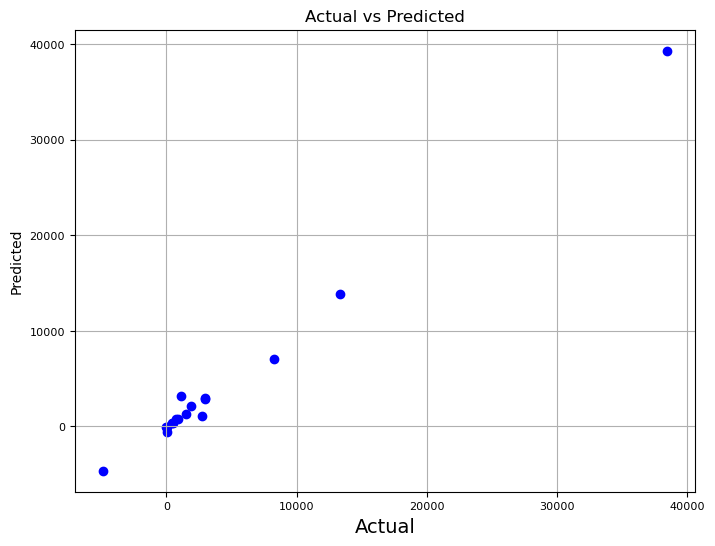

In [82]:
# Plotting y_test and y_pred
figure = plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual', fontsize=14)
plt.xticks(fontsize=8)
plt.ylabel('Predicted')
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

#### Predict a single value

In [90]:
sample = x_test.iloc[0].values.reshape(1, -1)
sample

array([[715., 733., 819.]])

In [97]:
print('Predicted: ', lr.predict(sample), '| Actual :', y_test.iloc[0])

Predicted:  [[746.32654197]] | Actual : 2024    872.0
Name: 2, dtype: float64


In [101]:
# Save the model
import joblib
joblib.dump(lr, 'mac_model.pkl')

['mac_model.pkl']

In [102]:
# Load the model
model = joblib.load('mac_model.pkl')
model.predict(sample)

array([[746.32654197]])

-----

#### Random Forest Model

In [106]:
# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

# Cross validation score
cv_scores = cross_val_score(rf ,x,y, cv=5, scoring='r2')
Avg_cv_scores = cv_scores.mean()
print('R2: ', Avg_cv_scores)

R2:  0.8145540281632766


The model is fairly good on the training data; the **`R2`** is `0.8145`, which means that almost `82% `of the variance in target year can be explained by the data provided by the previous years. 

In [109]:
# Predicting and evaluating the random forest regressor

rf_pred = rf.predict(x_test)


print('MSE Score: ', mean_squared_error(y_test,rf_pred))
print('R2 Score: ', r2_score(y_test,rf_pred))


MSE Score:  1037000.3356775418
R2 Score:  0.9881252120581786


In [111]:
# Saving the model
joblib.dump(rf, 'mac_rf_model.pkl')

['mac_rf_model.pkl']

In [113]:
# Save the cleaned dataset
cleaned_data =df.to_csv('cleaned_mac_data.csv', index=False)

#### Executive Summary
This notebook analyzed McDonald's revenue breakdown from 2021 to 2024 using both Exploratory Data Analysis (EDA) and Machine Learning (ML).

Key takeaways:
* Revenue has shown a consistent upward trend over the 4 years.
* Franchised operations contribute more to total revenue than company-operated segments.
* We used Linear Regression and Random Forest models to predict 2024 revenue.
* The Linear Regression outperformed Random Forest model, achieving a higher R² score and lower error.
* Predictive modeling is feasible for estimating future revenue based on historical data.

This analysis can help stakeholders make informed decisions based on data-driven revenue forecasting.